In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data = data.iloc[:, :-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### The data may need normalization because the ranges of values for columns vary a lot in the dataset.

In [4]:
data.iloc[:,2:].describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Correlation Matrix:

In [62]:
corr = abs(data.iloc[:, 2:-1].corr())
corr.style.background_gradient(cmap='coolwarm')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
radius_mean,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.67909,0.0973174,0.674172,0.735864,0.2226,0.206,0.194204,0.376169,0.104321,0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953
texture_mean,0.323782,1,0.329533,0.321086,0.0233885,0.236702,0.302418,0.293464,0.071401,0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008
perimeter_mean,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.0867611,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.0816293,0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115
area_mean,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,0.28311,0.732562,0.0662802,0.726628,0.800086,0.166777,0.212583,0.20766,0.37232,0.0724966,0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357
smoothness_mean,0.170581,0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.0906507,0.219169,0.177193,0.426675,0.4732,0.433721,0.430297,0.699826
fractal_dimension_mean,0.311631,0.0764372,0.261477,0.28311,0.584792,0.565369,0.336783,0.166917,0.479921,1,0.000110995,0.164174,0.0398299,0.0901702,0.401964,0.559837,0.44663,0.341198,0.345007,0.688132,0.253691,0.0512692,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019


#### Using 0.75 cut-off value for high correlation, perimeter_mean and radius_mean, area_mean and radius_mean, concave points_mean and radius_mean, concave_points_mean and perimeter_mean, area_mean and perimeter_mean, area_se and area_mean, concavity_mean and compactness_mean, concave_points_mean and compactness_mean, concavity_mean and concave points_mean are highly correlated. Among these highly correlated pairs, concave points_mean, concavity, and compactness are correlated with most variables. <br> We need to consider reducing multi-collinearity in the predictors if we use regression models.

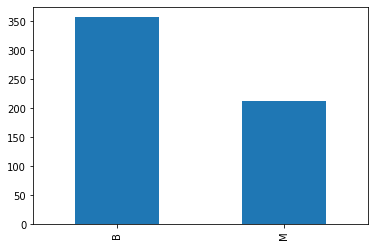

In [24]:
response = data.iloc[:, 1]
response.value_counts().plot(kind="bar")
plt.show()

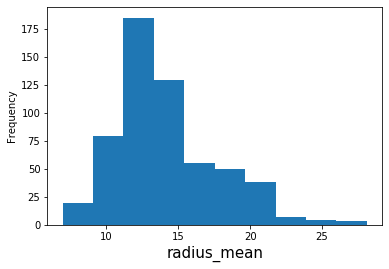

In [32]:
data["radius_mean"].plot(kind="hist")
plt.xlabel('radius_mean', fontsize="15")
plt.show()

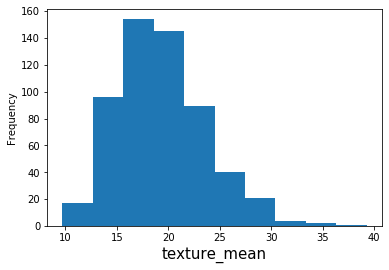

In [34]:
data["texture_mean"].plot(kind="hist")
plt.xlabel("texture_mean", fontsize="15")
plt.show()

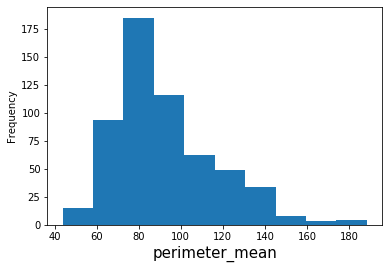

In [35]:
data["perimeter_mean"].plot(kind="hist")
plt.xlabel("perimeter_mean", fontsize="15")
plt.show()

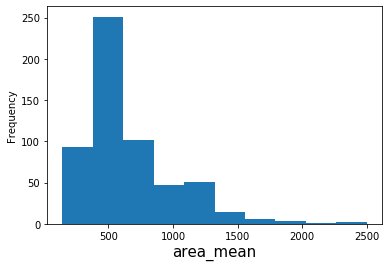

In [36]:
data["area_mean"].plot(kind="hist")
plt.xlabel("area_mean", fontsize="15")
plt.show()

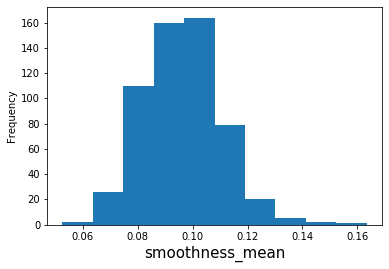

In [38]:
data["smoothness_mean"].plot(kind="hist")
plt.xlabel("smoothness_mean", fontsize="15")
plt.show()

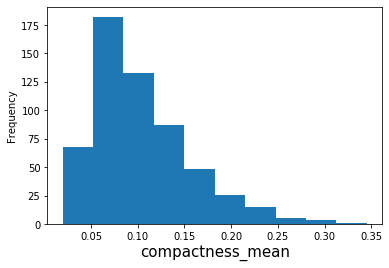

In [39]:
data["compactness_mean"].plot(kind="hist")
plt.xlabel("compactness_mean", fontsize="15")
plt.show()

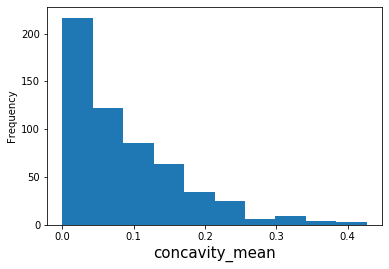

In [40]:
data["concavity_mean"].plot(kind="hist")
plt.xlabel("concavity_mean", fontsize="15")
plt.show()

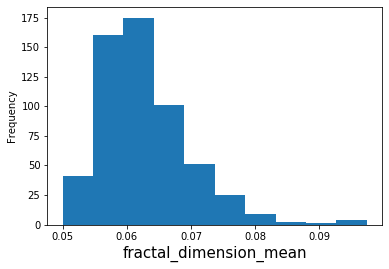

In [48]:
data["fractal_dimension_mean"].plot(kind="hist")
plt.xlabel("fractal_dimension_mean", fontsize="15")
plt.show()

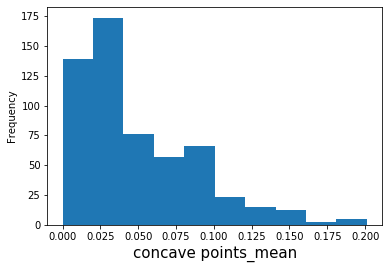

In [47]:
data["concave points_mean"].plot(kind="hist")
plt.xlabel("concave points_mean", fontsize="15")
plt.show()

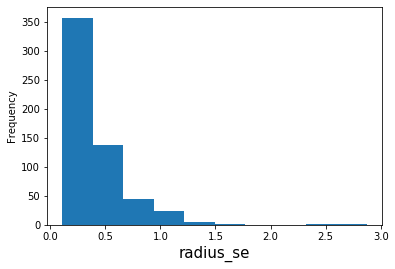

In [42]:
data["radius_se"].plot(kind="hist")
plt.xlabel("radius_se", fontsize="15")
plt.show()

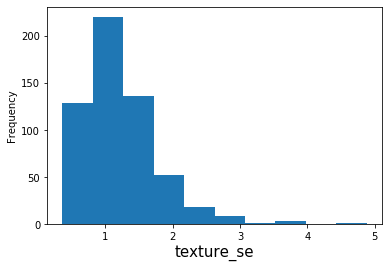

In [43]:
data["texture_se"].plot(kind="hist")
plt.xlabel("texture_se", fontsize="15")
plt.show()

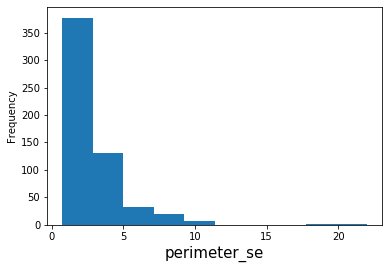

In [44]:
data["perimeter_se"].plot(kind="hist")
plt.xlabel("perimeter_se", fontsize="15")
plt.show()

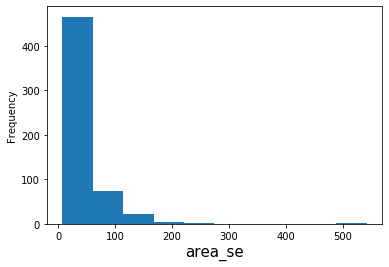

In [45]:
data["area_se"].plot(kind="hist")
plt.xlabel("area_se", fontsize="15")
plt.show()

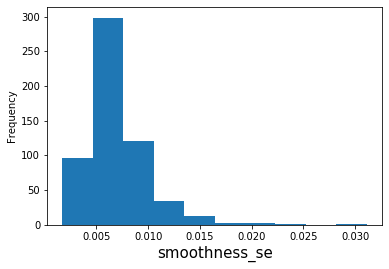

In [46]:
data["smoothness_se"].plot(kind="hist")
plt.xlabel("smoothness_se", fontsize="15")
plt.show()

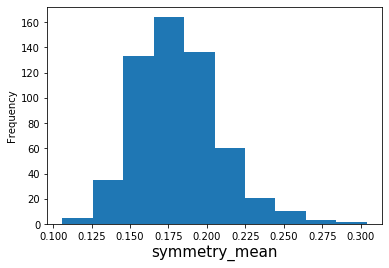

In [49]:
data["symmetry_mean"].plot(kind="hist")
plt.xlabel("symmetry_mean", fontsize="15")
plt.show()

### Data Normalization

In [5]:
# z-score normalization
from scipy import stats
x = data.drop(columns = ["diagnosis", "id"])
xMatrix = np.array(x)
xMatrix_norm = stats.zscore(xMatrix)

In [6]:
print(xMatrix_norm)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [7]:
xMatrix_norm.shape

(569, 30)

### Principal Component Analysis

In [8]:
from sklearn import decomposition

In [9]:
X = np.mat(xMatrix_norm)
pca = decomposition.PCA(n_components=30)
XTrans = pca.fit_transform(X)

In [10]:
XTrans.shape

(569, 30)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6', 'PC7','PC8','PC9', 'PC10','PC11', 
                   'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17','PC18','PC19', 'PC20',
                   'PC21', 'PC22','PC23','PC24', 'PC25', 'PC26', 'PC27','PC28','PC29', 'PC30']})
df["cum_var"] = df["var"].cumsum()

In [13]:
df

,var,PC,cum_var
0,0.442720,PC1,0.442720
1,0.189712,PC2,0.632432
2,0.093932,PC3,0.726364
3,0.066021,PC4,0.792385
4,0.054958,PC5,0.847343
5,0.040245,PC6,0.887588
6,0.022507,PC7,0.910095
7,0.015887,PC8,0.925983
8,0.013896,PC9,0.939879
9,0.011690,PC10,0.951569


- scree plot

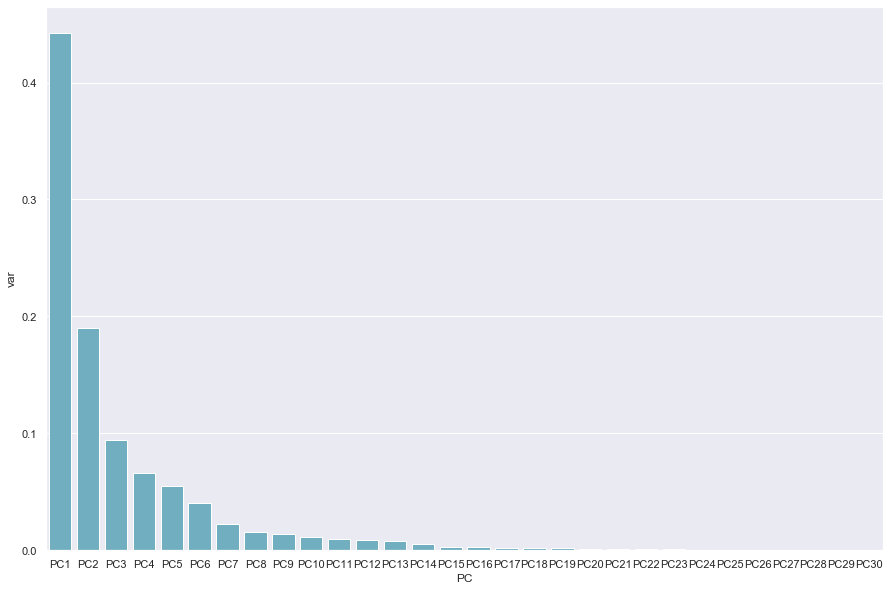

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

#### Result of PCA:

From the scree plot, we can see a sharp decrease in total variance explained at PC7. At PC7, the total percent of variance explained is 0.88. Hence, we can choose PC7 as our new feature space.
The selected variables are:

In [20]:
x_norm_df = pd.DataFrame(xMatrix_norm, columns=x.columns)
# PCA
pca = decomposition.PCA(n_components=7)
x_norm_df_trans = pca.fit_transform(x_norm_df)

# Dump components relations with features:
component_df = pd.DataFrame(pca.components_,columns=x_norm_df.columns,index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']).T

In [21]:
abs_component_df = abs(component_df)
selectedFeatures = abs_component_df.sort_values(by='PC7', ascending=False).PC7
selectedFeatures

fractal_dimension_worst    0.374657
concave points_se          0.369646
area_se                    0.346677
perimeter_se               0.314642
radius_se                  0.312491
fractal_dimension_mean     0.295760
smoothness_se              0.244024
concavity_se               0.208823
fractal_dimension_se       0.191396
concave points_worst       0.167967
concave points_mean        0.150483
smoothness_mean            0.140670
compactness_worst          0.140473
radius_mean                0.124088
perimeter_mean             0.114477
smoothness_worst           0.108830
concavity_mean             0.107520
symmetry_mean              0.093891
texture_se                 0.090755
symmetry_se                0.080383
area_worst                 0.067830
concavity_worst            0.060488
area_mean                  0.051654
compactness_mean           0.030920
compactness_se             0.023463
symmetry_worst             0.018490
texture_mean               0.011400
texture_worst              0

In [22]:
featureNames = selectedFeatures.iloc[1:17].index
selectedFeature = x[featureNames]

### Correlation Matrix

In [23]:
corr_selected = selectedFeature.corr()
corr_selected.style.background_gradient(cmap='coolwarm')

,concave points_se,area_se,perimeter_se,radius_se,fractal_dimension_mean,smoothness_se,concavity_se,fractal_dimension_se,concave points_worst,concave points_mean,smoothness_mean,compactness_worst,radius_mean,perimeter_mean,smoothness_worst,concavity_mean
concave points_se,1,0.41573,0.556264,0.513346,0.341198,0.328429,0.771804,0.611044,0.60245,0.615634,0.380676,0.452888,0.376169,0.407217,0.215351,0.68326
area_se,0.41573,1,0.937655,0.95183,-0.0901702,0.0751503,0.270895,0.127071,0.538166,0.690299,0.246552,0.283257,0.735864,0.744983,0.125389,0.617427
perimeter_se,0.556264,0.937655,1,0.972794,0.0398299,0.151075,0.362482,0.244143,0.554897,0.71065,0.296092,0.341919,0.674172,0.693135,0.130054,0.660391
radius_se,0.513346,0.95183,0.972794,1,0.000110995,0.164514,0.332358,0.227754,0.531062,0.69805,0.301467,0.287103,0.67909,0.691765,0.141919,0.631925
fractal_dimension_mean,0.341198,-0.0901702,0.0398299,0.000110995,1,0.401964,0.44663,0.688132,0.175325,0.166917,0.584792,0.458798,-0.311631,-0.261477,0.504942,0.336783
smoothness_se,0.328429,0.0751503,0.151075,0.164514,0.401964,1,0.268685,0.427374,-0.102007,0.0276533,0.332375,-0.0555581,-0.2226,-0.202694,0.314457,0.0985637
concavity_se,0.771804,0.270895,0.362482,0.332358,0.44663,0.268685,1,0.727372,0.440472,0.439167,0.248396,0.484858,0.194204,0.228082,0.168481,0.69127
fractal_dimension_se,0.611044,0.127071,0.244143,0.227754,0.688132,0.427374,0.727372,1,0.215204,0.257584,0.283607,0.390159,-0.0426413,-0.00552339,0.170568,0.449301
concave points_worst,0.60245,0.538166,0.554897,0.531062,0.175325,-0.102007,0.440472,0.215204,1,0.910155,0.503053,0.80108,0.744214,0.771241,0.547691,0.861323
concave points_mean,0.615634,0.690299,0.71065,0.69805,0.166917,0.0276533,0.439167,0.257584,0.910155,1,0.553695,0.667454,0.822529,0.850977,0.452753,0.921391


drop perimeter_mean and perimeter_worst.

### K Nearest Neighbors

In [24]:
data_norm = pd.read_csv("cancer_dataset_norm.csv", index_col = 0)
#data = pd.read_csv("cancer_dataset.csv",index_col = 0)
data_norm.head(10)

,fractal_dimension_worst,concave points_se,area_se,radius_se,fractal_dimension_mean,smoothness_se,concavity_se,fractal_dimension_se,concave points_worst,concave points_mean,smoothness_mean,compactness_worst,radius_mean,smoothness_worst,concavity_mean,diagnosis_M
0,0.418864,0.300625,0.273811,0.356147,0.605518,0.159296,0.135682,0.183042,0.912027,0.731113,0.593753,0.619292,0.521037,0.601136,0.703140,1
1,0.222878,0.253836,0.125660,0.156437,0.141323,0.119387,0.046970,0.091110,0.639175,0.348757,0.289880,0.154563,0.643144,0.347553,0.203608,1
2,0.213433,0.389847,0.162922,0.229622,0.211247,0.150831,0.096768,0.127006,0.835052,0.635686,0.514309,0.385375,0.601496,0.483590,0.462512,1
3,0.773711,0.353665,0.038155,0.139091,1.000000,0.251453,0.142955,0.287205,0.884880,0.522863,0.811321,0.814012,0.210090,0.915472,0.565604,1
4,0.142595,0.357075,0.163688,0.233822,0.186816,0.332359,0.143636,0.145800,0.558419,0.518390,0.430351,0.172415,0.629893,0.437364,0.463918,1
5,0.454939,0.215382,0.038080,0.080753,0.551179,0.197063,0.092727,0.144660,0.598282,0.402038,0.678613,0.482784,0.258839,0.712739,0.369728,1
6,0.187853,0.196818,0.087987,0.121383,0.157119,0.088418,0.056919,0.044367,0.663918,0.367793,0.379164,0.223448,0.533343,0.482269,0.264058,1
7,0.393939,0.274294,0.082477,0.170922,0.517060,0.241085,0.062828,0.156060,0.534708,0.297465,0.598267,0.330753,0.318472,0.622268,0.219447,1
8,0.342123,0.232241,0.032720,0.070541,0.504002,0.136588,0.089722,0.098607,0.707904,0.464861,0.674099,0.497531,0.284869,0.654626,0.435567,1
9,1.000000,0.271263,0.032010,0.067391,0.683867,0.184791,0.195530,0.317331,0.759450,0.424602,0.595558,1.000000,0.259312,0.753682,0.532568,1


In [25]:
from sklearn import preprocessing
from sklearn import neighbors

In [27]:
target = data_norm.diagnosis_M
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_M, Length: 569, dtype: int64

In [30]:
x = data_norm.drop(columns="diagnosis_M")
x.shape

(569, 15)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=33)

In [32]:
x_train.shape

(455, 15)

In [33]:
x_train

,fractal_dimension_worst,concave points_se,area_se,radius_se,fractal_dimension_mean,smoothness_se,concavity_se,fractal_dimension_se,concave points_worst,concave points_mean,smoothness_mean,compactness_worst,radius_mean,smoothness_worst,concavity_mean
200,0.175128,0.215950,0.038173,0.087597,0.214195,0.197199,0.035379,0.084408,0.371134,0.204125,0.390268,0.171639,0.248426,0.473684,0.098102
438,0.092287,0.133340,0.042637,0.083433,0.142586,0.140157,0.014677,0.049445,0.202405,0.113966,0.308838,0.084223,0.325098,0.268309,0.031443
337,0.286370,0.344005,0.152126,0.192178,0.228939,0.198355,0.098838,0.122652,0.703780,0.302684,0.347838,0.441841,0.557954,0.519250,0.248360
309,0.070576,0.091324,0.048951,0.103567,0.109941,0.082775,0.007149,0.047614,0.121375,0.043882,0.278866,0.030251,0.287236,0.200951,0.010682
26,0.475272,0.256109,0.026612,0.051783,0.406066,0.093109,0.067702,0.097294,0.928179,0.436531,0.476393,0.618030,0.359648,0.537080,0.333880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.094779,0.159500,0.016713,0.029947,0.141323,0.121868,0.058611,0.043434,0.282990,0.118141,0.241762,0.119636,0.280610,0.254441,0.090745
57,0.356553,0.240955,0.062174,0.112656,0.371104,0.066152,0.064949,0.111010,0.630241,0.403728,0.551323,0.389741,0.365801,0.433402,0.302952
201,0.154991,0.254783,0.063370,0.103422,0.104254,0.148792,0.068510,0.060915,0.666323,0.372167,0.334477,0.305333,0.499740,0.441986,0.242737
391,0.220451,0.000000,0.041181,0.146804,0.442713,0.479553,0.000000,0.201802,0.000000,0.000000,0.462851,0.100620,0.082967,0.494156,0.000000


In [34]:
x_test

,fractal_dimension_worst,concave points_se,area_se,radius_se,fractal_dimension_mean,smoothness_se,concavity_se,fractal_dimension_se,concave points_worst,concave points_mean,smoothness_mean,compactness_worst,radius_mean,smoothness_worst,concavity_mean
27,0.125738,0.362000,0.162007,0.268477,0.148062,0.307203,0.128308,0.114776,0.512027,0.384245,0.377088,0.178916,0.550381,0.413590,0.349110
142,0.170012,0.180337,0.027228,0.062575,0.329823,0.168304,0.029242,0.090903,0.220000,0.092495,0.510698,0.147384,0.210564,0.463118,0.047587
419,0.106192,0.116670,0.022764,0.063371,0.241786,0.176599,0.017606,0.040255,0.147973,0.053479,0.443893,0.081022,0.197785,0.376610,0.020982
495,0.071822,0.224095,0.028088,0.043744,0.158382,0.125846,0.054369,0.031687,0.349485,0.246074,0.390358,0.108188,0.373373,0.333025,0.159888
472,0.181621,0.159102,0.030833,0.048198,0.141744,0.052963,0.058333,0.051276,0.394158,0.160089,0.255936,0.244307,0.375740,0.233309,0.129780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.418864,0.300625,0.273811,0.356147,0.605518,0.159296,0.135682,0.183042,0.912027,0.731113,0.593753,0.619292,0.521037,0.601136,0.703140
464,0.093205,0.160314,0.018842,0.032881,0.116470,0.144678,0.039495,0.026851,0.359107,0.142644,0.198881,0.164168,0.292915,0.376610,0.113847
449,0.126000,0.277704,0.140247,0.200181,0.140059,0.127613,0.080429,0.045265,0.783505,0.574056,0.399115,0.274384,0.668229,0.433402,0.368322
484,0.175587,0.202122,0.013201,0.018649,0.266007,0.146888,0.084242,0.047027,0.498969,0.308698,0.466462,0.262547,0.414075,0.547646,0.279053


In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
acc = []
for n_neighbors in range(1, 31):
    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    knnFit = knnclf.fit(x_train, y_train)
    y_pred_test = knnFit.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_test))
    print("number of neighbors = {}:".format(n_neighbors))
    print(classification_report(y_test, y_pred_test))

number of neighbors = 1:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

number of neighbors = 2:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

number of neighbors = 3:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

number of neighbors = 29:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

number of neighbors = 30:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.9

In [36]:
from sklearn.metrics import classification_report

In [37]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.semilogx(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [38]:
### We can use this function ot do cross-validation

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator of K folds
    cv = KFold(n_splits=K, random_state=0, shuffle=True)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: %.3f (+/-%.3f)" % (np.mean(scores), sem(scores)))

In [39]:
knn_clf = neighbors.KNeighborsClassifier(weights='distance')
evaluate_cross_validation(knn_clf, x_train, y_train, 5)

[0.95604396 0.95604396 0.93406593 0.94505495 0.93406593]
Mean score: 0.945 (+/-0.005)


n_neighbors = 1 Train = 1.0 Test = 0.9274725274725275
n_neighbors = 2 Train = 1.0 Test = 0.9274725274725275
n_neighbors = 3 Train = 1.0 Test = 0.9318681318681319
n_neighbors = 4 Train = 1.0 Test = 0.9362637362637363
n_neighbors = 5 Train = 1.0 Test = 0.945054945054945
n_neighbors = 6 Train = 1.0 Test = 0.9472527472527472
n_neighbors = 7 Train = 1.0 Test = 0.9472527472527472
n_neighbors = 8 Train = 1.0 Test = 0.945054945054945
n_neighbors = 9 Train = 1.0 Test = 0.9494505494505494
n_neighbors = 10 Train = 1.0 Test = 0.9494505494505494
n_neighbors = 11 Train = 1.0 Test = 0.945054945054945
n_neighbors = 12 Train = 1.0 Test = 0.9428571428571428
n_neighbors = 13 Train = 1.0 Test = 0.9428571428571428
n_neighbors = 14 Train = 1.0 Test = 0.9516483516483516
n_neighbors = 15 Train = 1.0 Test = 0.9472527472527472
n_neighbors = 16 Train = 1.0 Test = 0.9472527472527472
n_neighbors = 17 Train = 1.0 Test = 0.9428571428571428
n_neighbors = 18 Train = 1.0 Test = 0.9428571428571428
n_neighbors = 19 Train

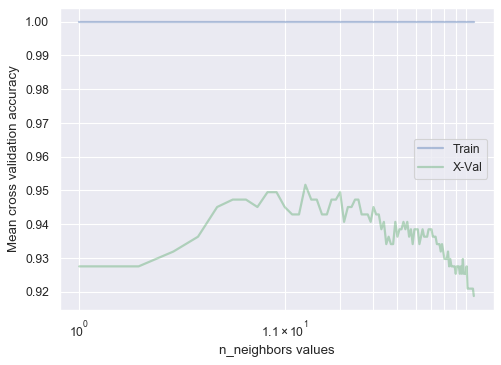

In [44]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
K = np.arange(1, 101)
train_scores, test_scores = calc_params(x_train, y_train, knn_clf, K, 'n_neighbors', 5)
plt.xticks(np.arange(1, 101, 10))
plt.show()

According to the above graph, when N_neighbors is between 46 and 49 we have the highest test accuracy and smallest overfitting. Hence, we select N_neighbors to be 49.

In [45]:
# BEST K-NN, select K = 14
knn_best = neighbors.KNeighborsClassifier(14, weights='distance')
knn_best = knn_best.fit(x_train, y_train)
y_pred_test = knn_best.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### Support Vector Machines classification

In [46]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score
accuracy = []
for C in range(1, 21):
    svcModel = SVC(kernel='linear', C=C)
    svcFit = svcModel.fit(x_train, y_train)
    y_pred_svm = svcFit.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred_svm))
    print("C = {}:".format(C))
    print(classification_report(y_test, y_pred_svm))

C = 1:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

C = 2:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

C = 3:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

In [47]:
svm_clf = SVC(kernel='linear')
evaluate_cross_validation(svm_clf, x_train, y_train, 5)

[0.95604396 0.94505495 0.92307692 0.96703297 0.93406593]
Mean score: 0.945 (+/-0.008)


C = 1 Train = 0.9648351648351647 Test = 0.945054945054945
C = 2 Train = 0.9615384615384615 Test = 0.9538461538461538
C = 3 Train = 0.9609890109890109 Test = 0.9472527472527472
C = 4 Train = 0.9615384615384615 Test = 0.9538461538461538
C = 5 Train = 0.9642857142857142 Test = 0.9516483516483516
C = 6 Train = 0.9642857142857142 Test = 0.9472527472527472
C = 7 Train = 0.9648351648351647 Test = 0.9472527472527472
C = 8 Train = 0.9648351648351647 Test = 0.9494505494505494
C = 9 Train = 0.9653846153846153 Test = 0.9494505494505494
C = 10 Train = 0.9659340659340658 Test = 0.9494505494505494
C = 11 Train = 0.9659340659340658 Test = 0.9494505494505494
C = 12 Train = 0.9670329670329669 Test = 0.9472527472527472
C = 13 Train = 0.9670329670329669 Test = 0.9472527472527472
C = 14 Train = 0.9664835164835164 Test = 0.9472527472527472
C = 15 Train = 0.9670329670329669 Test = 0.9494505494505494
C = 16 Train = 0.9686813186813186 Test = 0.9494505494505494
C = 17 Train = 0.968131868131868 Test = 0.94945054

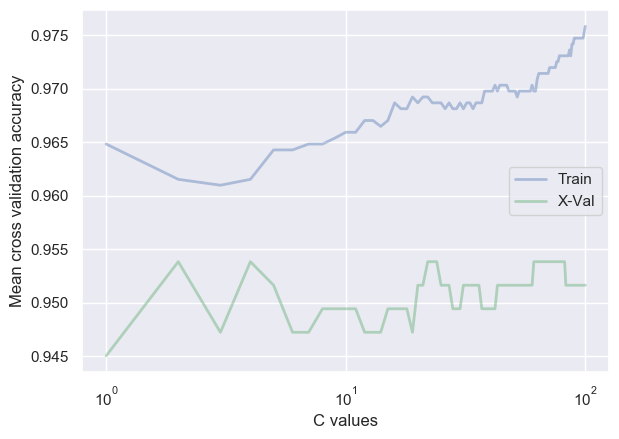

In [51]:
c_vals = np.arange(1, 101)
figure(num=None, figsize=(6.8, 4.8), dpi=100, facecolor='w', edgecolor='k')
train_scores, test_scores = calc_params(x_train, y_train, svm_clf, c_vals, 'C', 5)

Best C parameter is 4 because both train and test sets have high accuracy and the gap between them is low.

In [52]:
# BEST SVM, C=4
svm_best = SVC(kernel='linear', C=4)
svm_best = svcModel.fit(x_train, y_train)
y_pred_svm = svm_best.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

